# 4. Estimator error
#### error_estimator_error_estimator_mean_stratified
* error_estimator = mean_stratified - mean_unstratified

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# remove waringns
import warnings
warnings.filterwarnings("ignore")

from utils_evaluation import barplot_coloured_by_parameter, barplot_one_var



# set model 
model = 'rf'

if model == 'rf':
    model_name = 'Random Forest'
elif model == 'xgb':
    model_name = 'XGBoost'
else:
    raise ValueError('model not supported')
    
# load csv
df = pd.read_csv('/Users/nadja/Documents/University/Master_Statistik/WS2023_24/SLDS/slds_stratification/Simulations/Final_Setup/Evaluation/tables/' + model +'/results_per_parameter.csv')

experimental_parameters = ['param_model', 'param_transformation',  'param_n_train', 'param_group_size', 'param_noise']

# split parameter_combination_string into separate columns
for i, param in enumerate(experimental_parameters):
    df[param] = df['parameter_combination_string'].str.split('_').str[i]
    
# convert numeric columns to integer type
numeric_columns = ['param_n_train', 'param_group_size', 'param_noise']
df[numeric_columns] = df[numeric_columns].astype(int)

# checks
print(df.shape)
print(df['num_exp'].unique())

(24, 39)
[200]


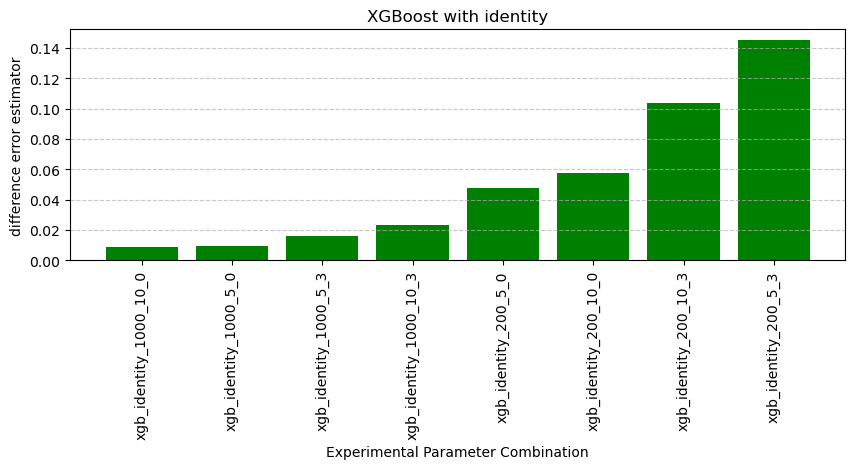

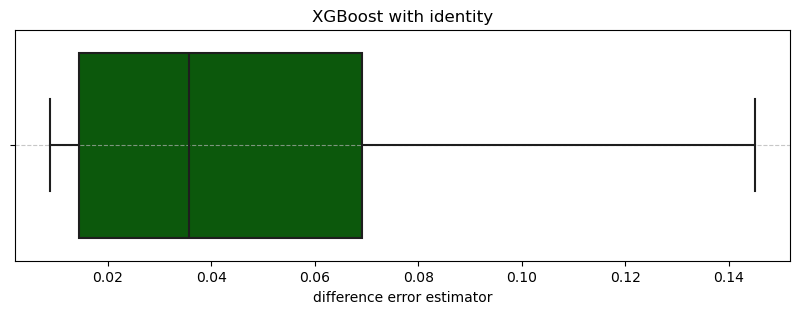

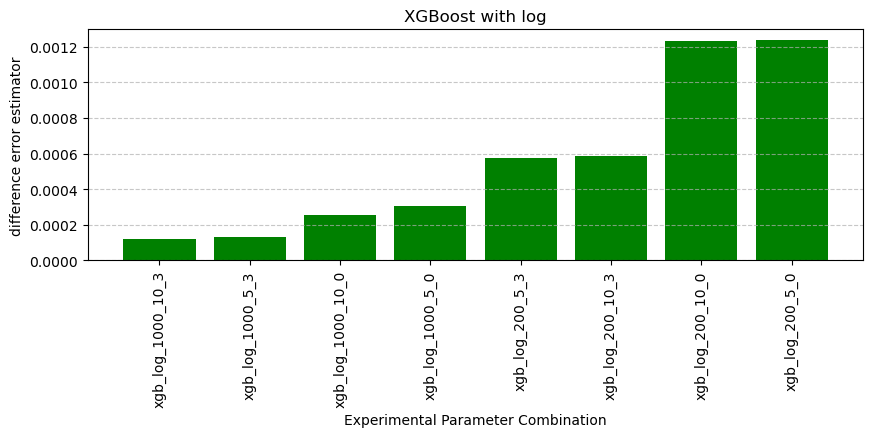

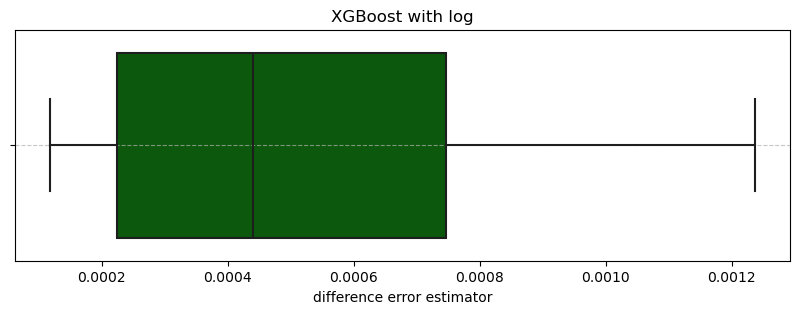

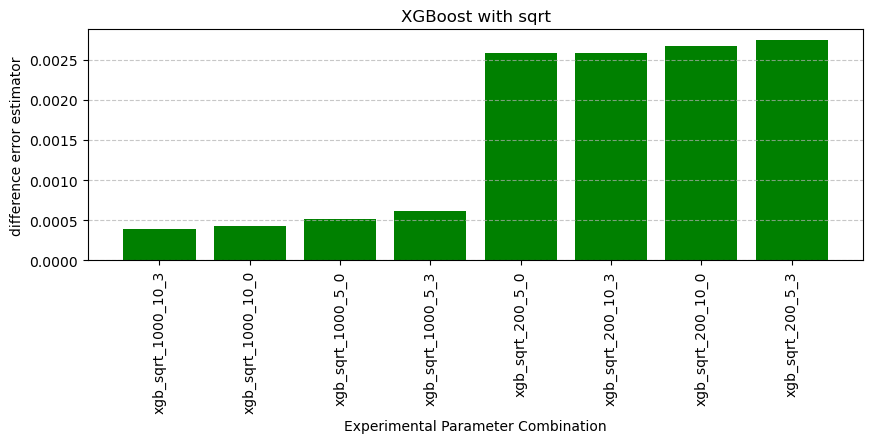

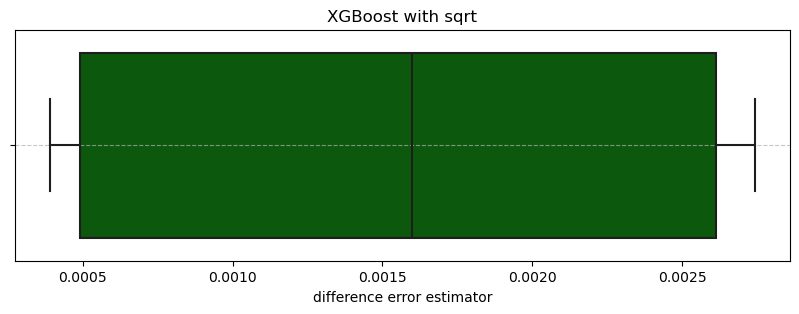

In [111]:
transformations = df['param_transformation'].unique()

for tranfrom in transformations:
    df_transformation = df[df['param_transformation'] == tranfrom]
    _ = barplot_one_var(df_transformation, 'error_estimator_mean_diff', title= model_name + ' with ' + tranfrom, y_label = 'difference error estimator')

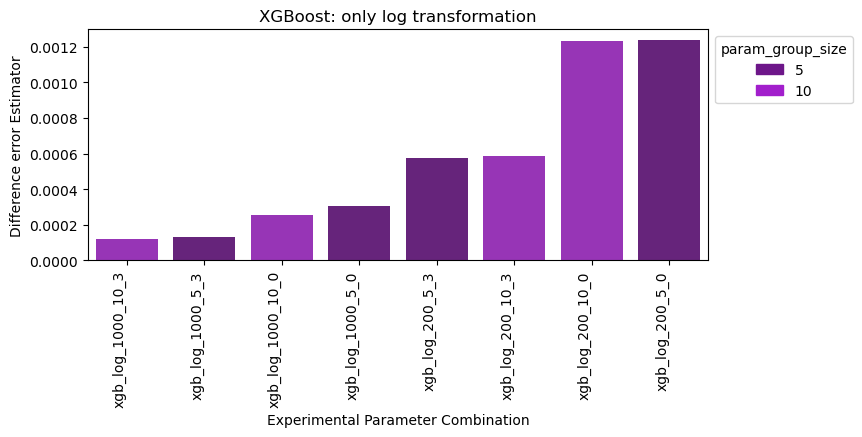

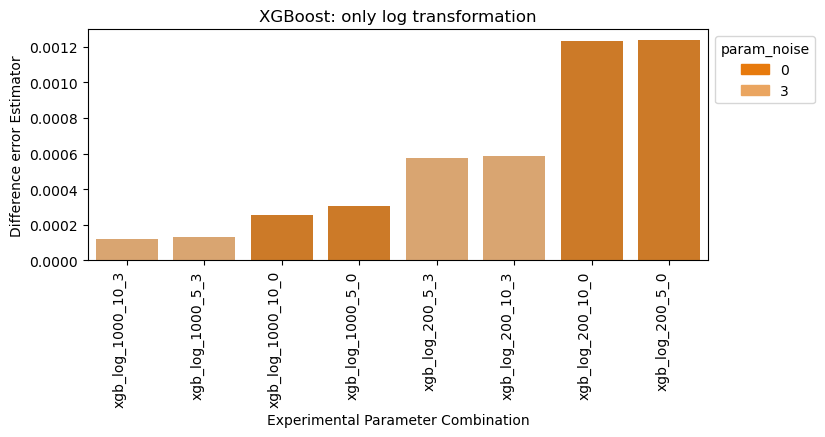

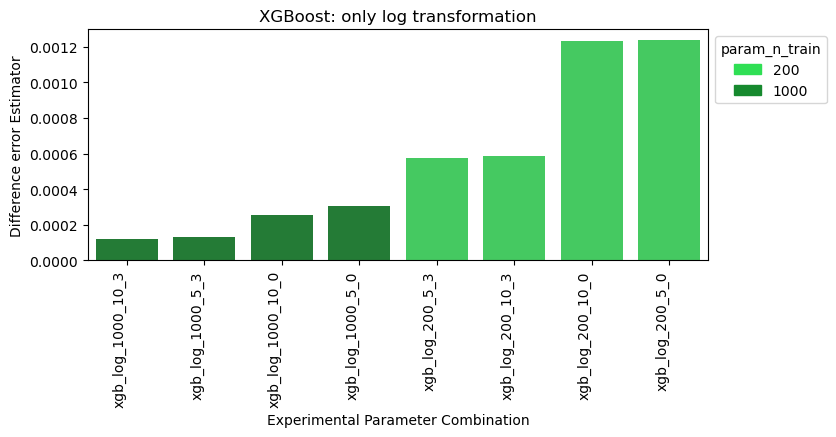

In [112]:
experimental_parameters = ['param_group_size', 'param_noise', 'param_n_train']
df_transfromation= df[df['param_transformation'] == 'log']

for experimental_parameter in experimental_parameters:
   barplot_coloured_by_parameter(data = df_transfromation, experimental_parameter = experimental_parameter, variable_y = 'error_estimator_mean_diff', title = model_name + ': only log transformation', variable_y_title = 'Difference error Estimator')

Standard deviation of error estimator for stratified and unstratified:

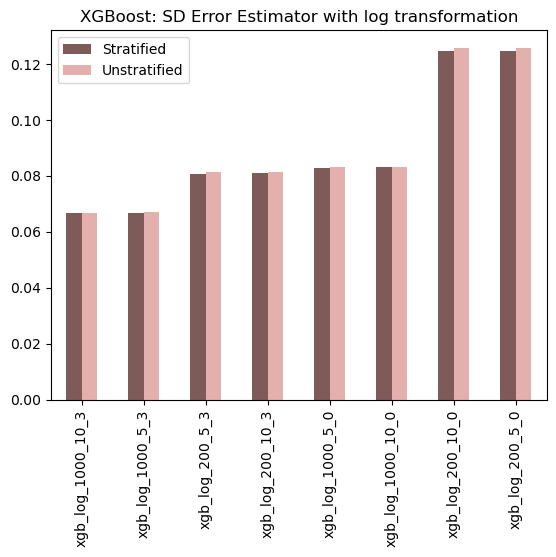

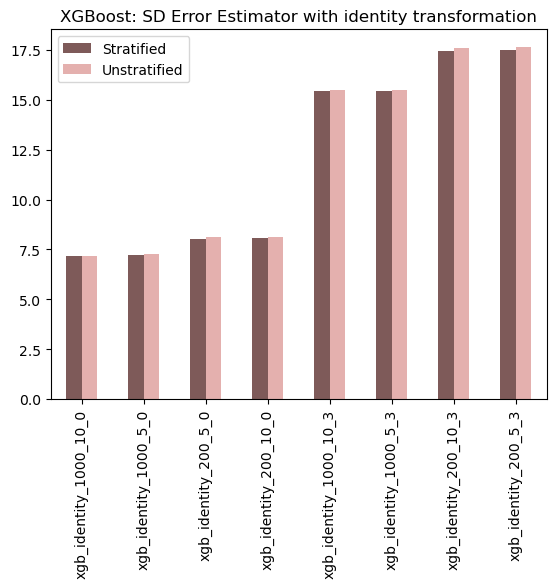

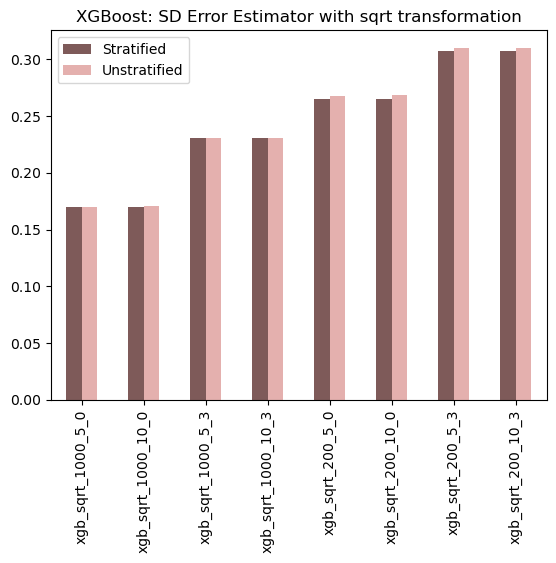

In [120]:
for transformation in ['log', 'identity', 'sqrt']:
    df_transfromation = df[df['param_transformation'] == transformation]

    df_plot = pd.DataFrame({'Stratified': df_transfromation['error_estimator_sd_stratified'].values,
                            'Unstratified': df_transfromation['error_estimator_sd_unstratified'].values},
                           index=df_transfromation['parameter_combination_string'].values)
    
    df_plot = df_plot.sort_values(by=['Stratified', 'Unstratified'], ascending=True)

    ax = df_plot.plot.bar(rot=0, color={"Stratified": '#7E5A59', "Unstratified": '#E4B0AE'})
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f'{model_name}: SD Error Estimator with {transformation} transformation')


'rf'

count    24.000000
mean     -0.022289
std       0.042337
min      -0.157129
25%      -0.018165
50%      -0.001171
75%      -0.000303
max      -0.000083
Name: diff_sd, dtype: float64

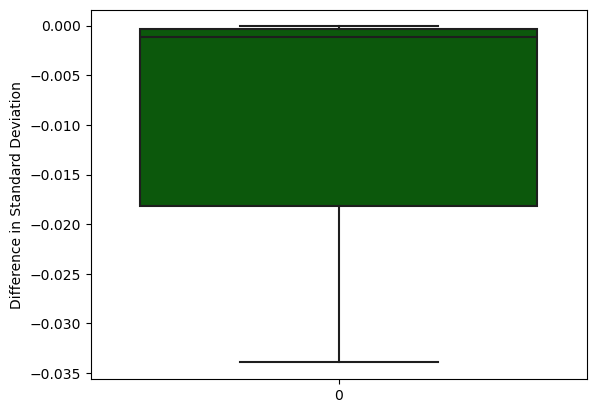

In [138]:
df['diff_sd'] = df['error_estimator_sd_stratified'] - df['error_estimator_sd_unstratified']

# boxplot of df['diff_sd'] without outliers
ax = sns.boxplot(df['diff_sd'], showfliers=False, color='darkgreen')
ax.set_ylabel('Difference in Standard Deviation')

df['diff_sd'].describe()


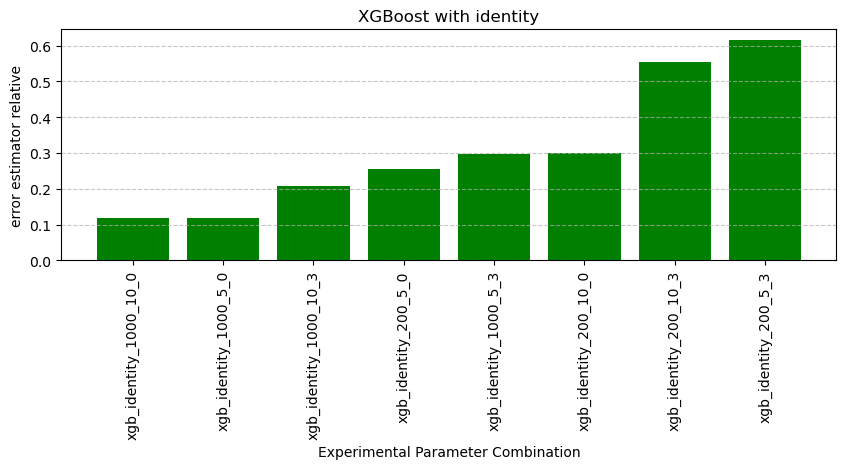

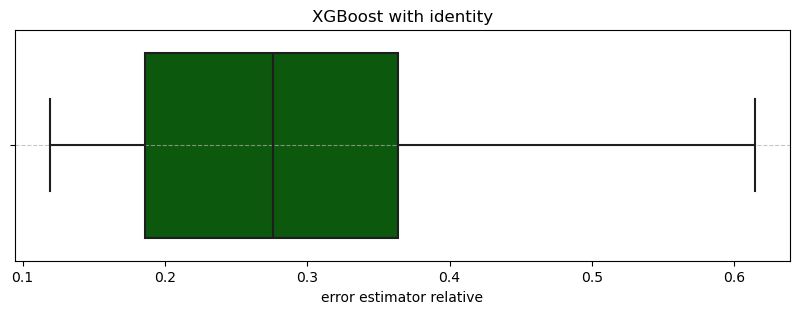

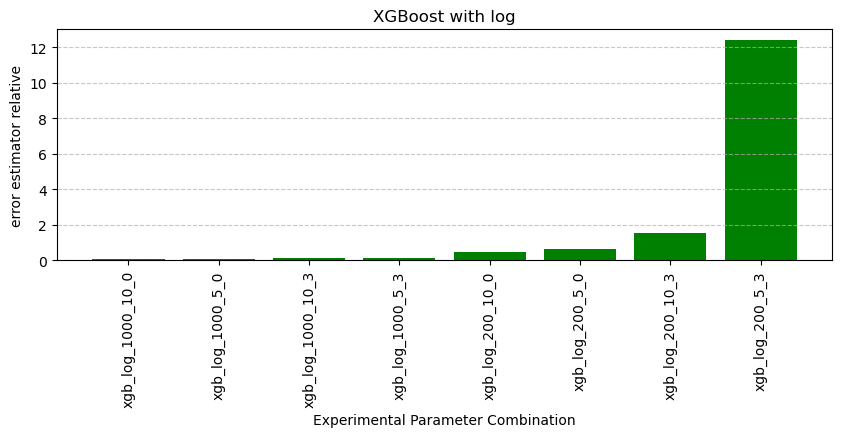

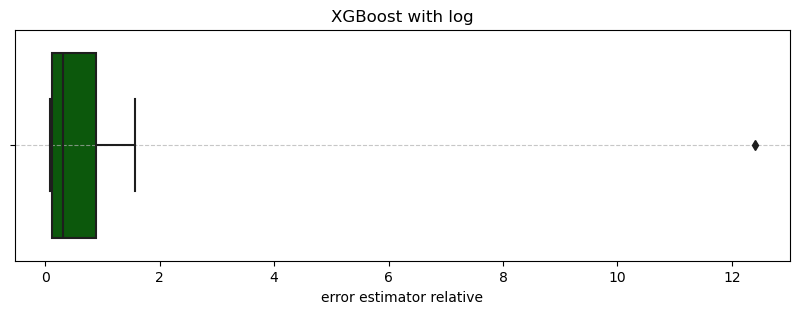

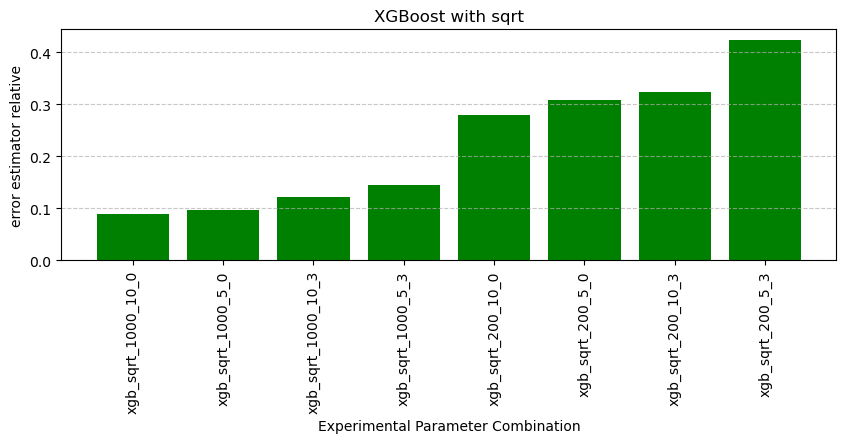

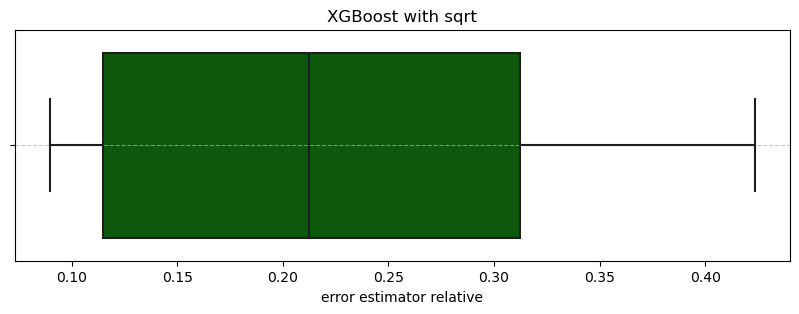

In [114]:
df['diff_relative'] = df['error_estimator_mean_diff']/abs(df['error_estimator_mean_unstratified'])

transformations = df['param_transformation'].unique()

for tranfrom in transformations:
    df_transformation = df[df['param_transformation'] == tranfrom]
    _ = barplot_one_var(df_transformation, 'diff_relative', title= model_name + ' with ' + tranfrom, y_label = 'error estimator relative')

In [115]:
df.loc[:, ['param_transformation', 'parameter_combination_string', 'error_estimator_mean_diff', 'error_estimator_mean_unstratified', 'error_estimator_mean_stratified', 'diff_relative']]

,param_transformation,parameter_combination_string,error_estimator_mean_diff,error_estimator_mean_unstratified,error_estimator_mean_stratified,diff_relative
0,identity,xgb_identity_200_5_0,0.048043,-0.188377,-0.140334,0.255038
1,identity,xgb_identity_200_5_3,0.145016,-0.236090,-0.091075,0.614237
2,identity,xgb_identity_200_10_0,0.057426,-0.191505,-0.134079,0.299867
3,identity,xgb_identity_200_10_3,0.103819,-0.187221,-0.083403,0.554524
4,identity,xgb_identity_1000_5_0,0.009655,-0.080730,-0.071075,0.119598
5,identity,xgb_identity_1000_5_3,0.015873,-0.053457,-0.037584,0.296931
6,identity,xgb_identity_1000_10_0,0.008823,-0.073973,-0.065150,0.119273
7,identity,xgb_identity_1000_10_3,0.023349,-0.112247,-0.088899,0.208011
8,log,xgb_log_200_5_0,0.001236,-0.001906,-0.000670,0.648606
9,log,xgb_log_200_5_3,0.000575,0.000046,0.000621,12.398383


In [116]:
df_latex = df.loc[:, ['param_transformation', 'parameter_combination_string', 'error_estimator_mean_diff', 'error_estimator_mean_unstratified', 'error_estimator_mean_stratified']]
df_latex.groupby('param_transformation')
df_latex.sort_values(['error_estimator_mean_diff'],ascending=True)
df_latex = df_latex.drop(df_latex.columns[0], axis=1)
df_latex

,parameter_combination_string,error_estimator_mean_diff,error_estimator_mean_unstratified,error_estimator_mean_stratified
0,xgb_identity_200_5_0,0.048043,-0.188377,-0.140334
1,xgb_identity_200_5_3,0.145016,-0.236090,-0.091075
2,xgb_identity_200_10_0,0.057426,-0.191505,-0.134079
3,xgb_identity_200_10_3,0.103819,-0.187221,-0.083403
4,xgb_identity_1000_5_0,0.009655,-0.080730,-0.071075
5,xgb_identity_1000_5_3,0.015873,-0.053457,-0.037584
6,xgb_identity_1000_10_0,0.008823,-0.073973,-0.065150
7,xgb_identity_1000_10_3,0.023349,-0.112247,-0.088899
8,xgb_log_200_5_0,0.001236,-0.001906,-0.000670
9,xgb_log_200_5_3,0.000575,0.000046,0.000621


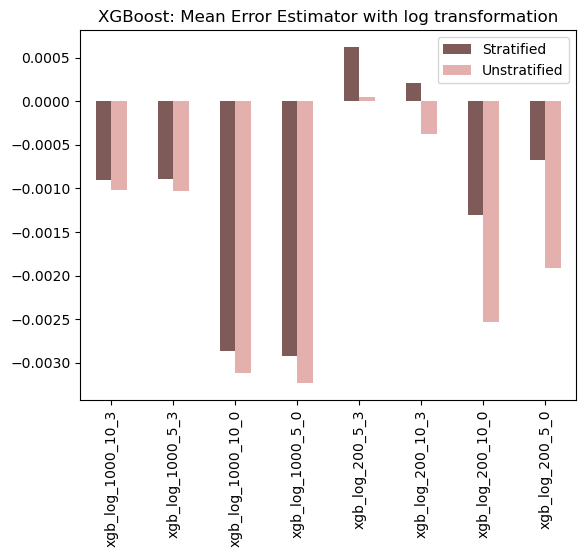

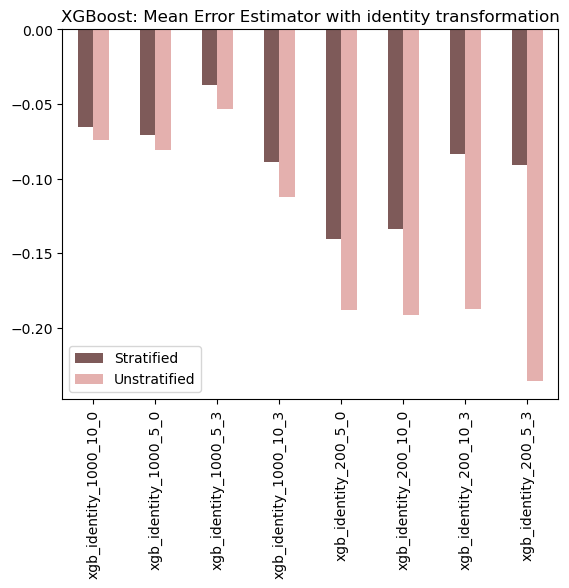

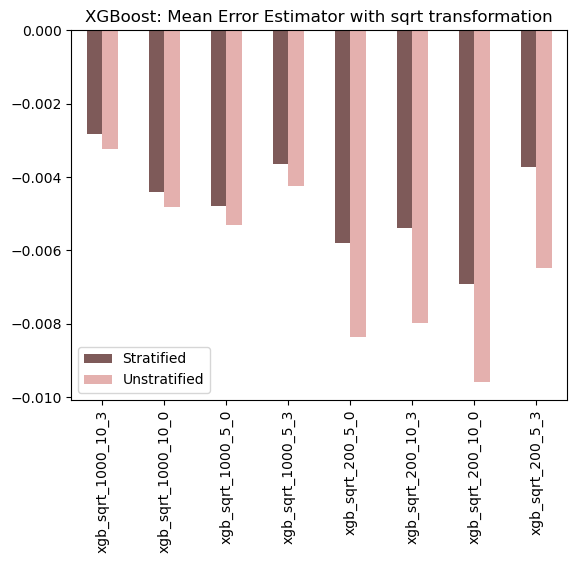

In [117]:
df_plots = df.loc[:, ['param_transformation', 'parameter_combination_string', 'error_estimator_mean_diff', 'error_estimator_mean_unstratified', 'error_estimator_mean_stratified', 'diff_relative']]


for transformation in ['log', 'identity', 'sqrt']:
    df_transfromation = df_plots[df_plots['param_transformation'] == transformation]
    df_transfromation = df_transfromation.sort_values(['error_estimator_mean_diff'],ascending=True)

    df_plot = pd.DataFrame({'Stratified': df_transfromation['error_estimator_mean_stratified'].values,
                            'Unstratified': df_transfromation['error_estimator_mean_unstratified'].values},
                           index=df_transfromation['parameter_combination_string'].values)
    
    #df_plot = df_plot.sort_values(by=['Stratified', 'Unstratified'], ascending=True)

    ax = df_plot.plot.bar(rot=0, color={"Stratified": '#7E5A59', "Unstratified": '#E4B0AE'})
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(f'{model_name}: Mean Error Estimator with {transformation} transformation')


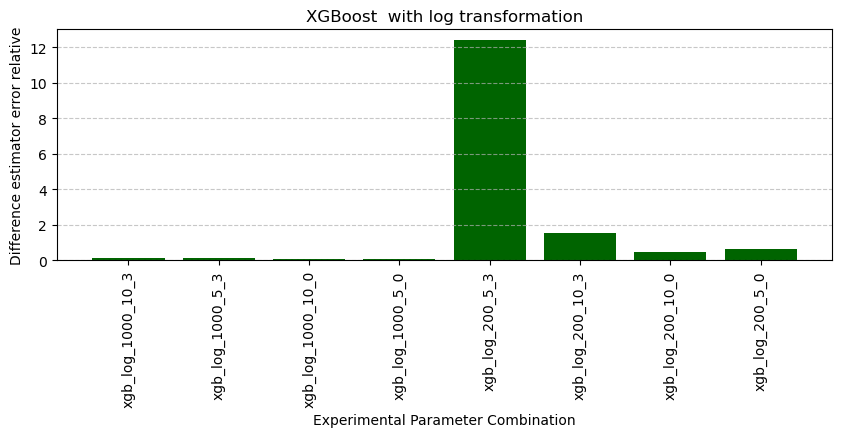

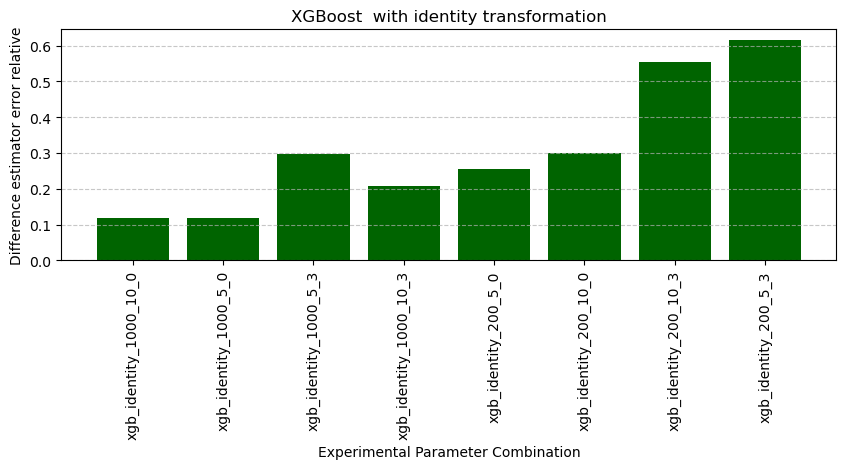

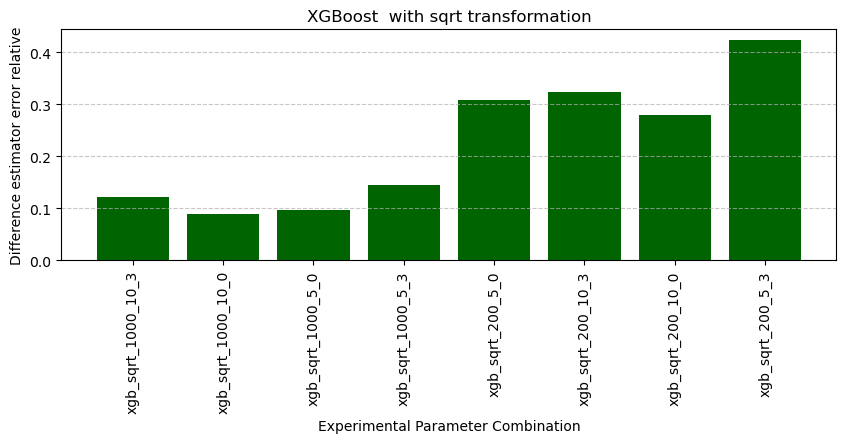

In [118]:
    
for transformation in ['log', 'identity', 'sqrt']:
    df_transfromation = df_plots[df_plots['param_transformation'] == transformation]
    df_sorted = df_transfromation.sort_values(['error_estimator_mean_diff'],ascending=True)
    # Barplot
    plt.figure(figsize=(10, 3))  
    plt.bar(df_sorted['parameter_combination_string'], df_sorted['diff_relative'], color= 'darkgreen')
    plt.xlabel('Experimental Parameter Combination')
    plt.ylabel('Difference estimator error relative')
    plt.title(model_name + '  with ' + transformation + ' transformation')
    plt.xticks(df_sorted['parameter_combination_string'], rotation=90)  #
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()